In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from joblib import dump
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('maindata.csv')

In [3]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23994,0,tcp,http,SF,217,458,0,0,0,0,...,255,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal
23995,0,tcp,http,SF,225,1155,0,0,0,0,...,255,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal
23996,0,tcp,http,SF,209,440,0,0,0,0,...,255,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal
23997,0,tcp,http,SF,280,362,0,0,0,0,...,255,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal


In [4]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   9   
1               0       0    0  ...                  19   
2               0       0    0  ...                  29   
3               0       0    0  ...                  39   
4               0       0    0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0         

In [5]:
print("Summary statistics of numerical features:")
print(data.describe())

Summary statistics of numerical features:
           duration      src_bytes      dst_bytes     land  wrong_fragment  \
count  23999.000000   23999.000000   23999.000000  23999.0    23999.000000   
mean       1.371765     511.516772    3495.475936      0.0        0.013126   
std      106.701143    2393.074546    9133.318589      0.0        0.193535   
min        0.000000       0.000000       0.000000      0.0        0.000000   
25%        0.000000     218.000000     313.000000      0.0        0.000000   
50%        0.000000     280.000000    1019.000000      0.0        0.000000   
75%        0.000000     348.000000    3005.000000      0.0        0.000000   
max    12454.000000  250697.000000  507534.000000      0.0        3.000000   

        urgent           hot  num_failed_logins     logged_in  \
count  23999.0  23999.000000       23999.000000  23999.000000   
mean       0.0      0.040668           0.002375      0.809325   
std        0.0      0.830604           0.056595      0.39284

In [6]:
print("Data types of each column:")
print(data.dtypes)

Data types of each column:
duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
lnum_compromised                 int64
lroot_shell                      int64
lsu_attempted                    int64
lnum_root                        int64
lnum_file_creations              int64
lnum_shells                      int64
lnum_access_files                int64
lnum_outbound_cmds               int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float6

In [7]:
print("Missing values in the dataset:")
print(data.isnull().sum())

Missing values in the dataset:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rat

<ipython-input-8-cb9fcb797a7b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='Set2')


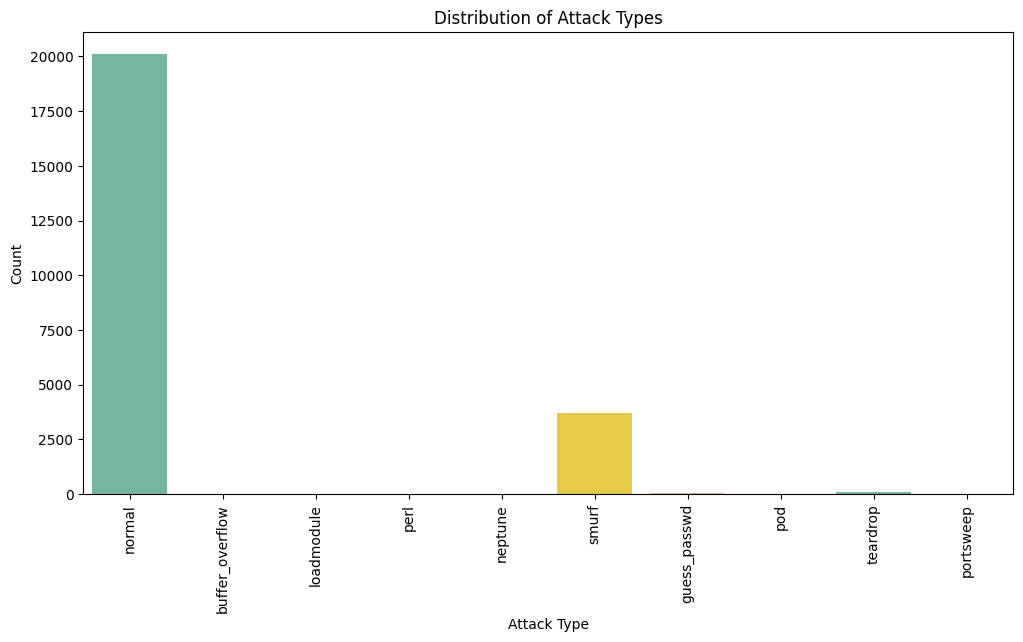

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(x='label', data=data, palette='Set2')
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

In [9]:
data_numeric = data.select_dtypes(include=["number"])

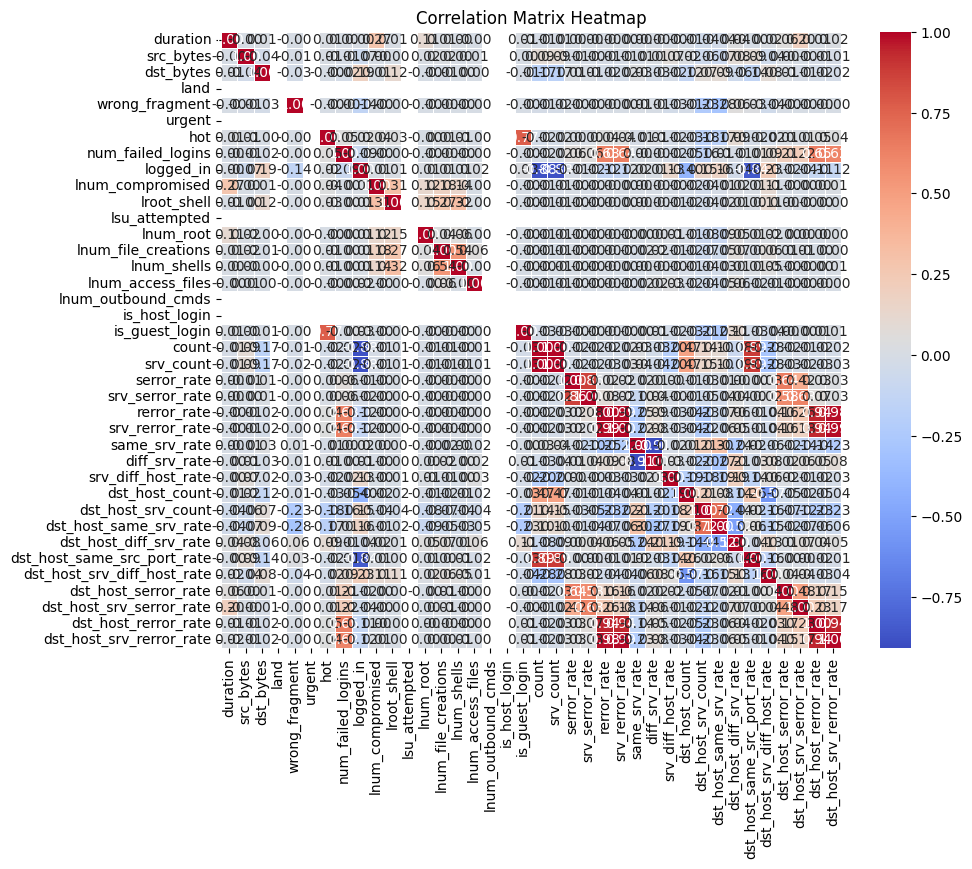

In [10]:
# Calculate the correlation matrix
corr_matrix = data_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

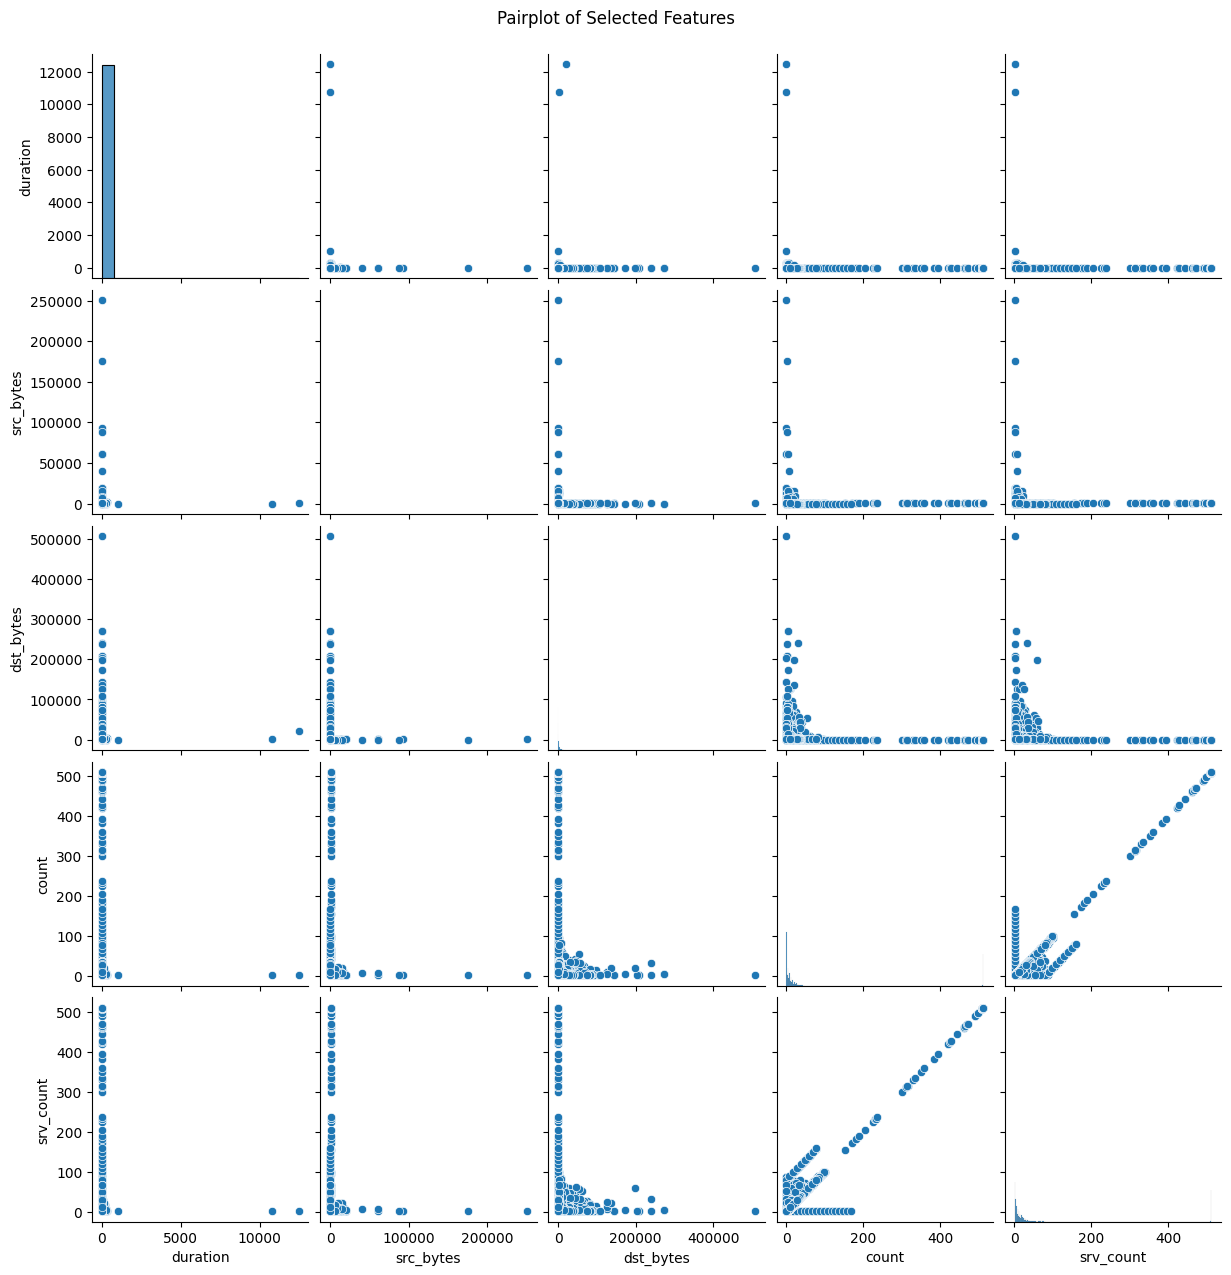

In [11]:
subset_features = ['duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count']
sns.pairplot(data[subset_features], kind='scatter')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

In [12]:
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

In [13]:
data = pd.get_dummies(data, columns=['protocol_type', 'service', 'flag'])

In [14]:
X = data.drop('label', axis=1)
y = data['label']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
svm_model = SVC(kernel='linear', random_state=2)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=2)

In [17]:
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_classification_report = classification_report(y_test, svm_predictions)

In [18]:
print("SVM Model Evaluation:")
print("Accuracy:", svm_accuracy)
print(svm_classification_report)

SVM Model Evaluation:
Accuracy: 0.9997916666666666
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00      4025
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00       736
           9       1.00      1.00      1.00        23

    accuracy                           1.00      4800
   macro avg       0.97      1.00      0.98      4800
weighted avg       1.00      1.00      1.00      4800



In [19]:
dump(svm_model, 'SVM.joblib')

['SVM.joblib']

In [20]:
rf_model = RandomForestClassifier(n_estimators=100, max_features=3)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features=3)

In [21]:
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_classification_report = classification_report(y_test, rf_predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
print("Random Forest Model Evaluation:")
print("Accuracy:", rf_accuracy)
print(rf_classification_report)

Random Forest Model Evaluation:
Accuracy: 0.9995833333333334
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         9
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00      4025
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00       736
           9       1.00      1.00      1.00        23

    accuracy                           1.00      4800
   macro avg       0.75      0.75      0.75      4800
weighted avg       1.00      1.00      1.00      4800



In [23]:
dump(rf_model, 'RF.joblib')

['RF.joblib']